In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from scipy import stats
import matplotlib
import cartopy
import cartopy.crs as ccrs
import pickle
import os.path
from cartopy.util import add_cyclic_point
import warnings
warnings.filterwarnings("ignore")

In [14]:
mymodels = ["ACCESS-ESM1-5", "CAMS-CSM1-0", "CESM2-WACCM", "CanESM5", "GFDL-ESM4", "HadGEM3-GC31-LL", "INM-CM5-0",\
            "MPI-ESM1-2-LR", "UKESM1-0-LL", "AWI-ESM-1-1-LR", "CAS-ESM2-0", "CMCC-ESM2", "E3SM-1-1",\
            "GISS-E2-1-G", "IITM-ESM", "IPSL-CM6A-LR", "MRI-ESM2-0", "SAM0-UNICON", "BCC-ESM1", "CESM2", \
            "CNRM-ESM2-1", "EC-Earth3", "GISS-E2-2-G", "INM-CM4-8", "MIROC-ES2L", "NESM3", "TaiESM1", "GFDL-CM4"]
nmodel = len(mymodels)
lat = {}
lon = {}
lwu_C = {}
swu_C = {}
lwd_C = {}
swd_C = {}
sh_C = {}
lh_C = {}
clt_C = {}
lwu_585 = {}
swu_585 = {}
lwd_585 = {}
swd_585 = {}
sh_585 = {}
lh_585 = {}
clt_585 = {}

In [15]:
#Grab Control
datadir = "/net/aeolus/aura/hansingh/CMIP/piControl/processed/"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsus_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsus_piControl.nc", decode_times=False)
        swu_C[mymodels[i]]=myData.rsus[0,:,:].mean(axis=1)
        lat[mymodels[i]]=myData.lat
    if os.path.exists(datadir+mymodels[i]+"_rsds_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsds_piControl.nc", decode_times=False)
        swd_C[mymodels[i]]=myData.rsds[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlus_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlus_piControl.nc", decode_times=False)
        lwu_C[mymodels[i]]=myData.rlus[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlds_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlds_piControl.nc", decode_times=False)
        lwd_C[mymodels[i]]=myData.rlds[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_hfss_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfss_piControl.nc", decode_times=False)
        sh_C[mymodels[i]]=myData.hfss[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_hfls_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfls_piControl.nc", decode_times=False)
        lh_C[mymodels[i]]=myData.hfls[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_clt_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_clt_piControl.nc", decode_times=False)
        clt_C[mymodels[i]]=myData.clt[0,:,:].mean(axis=1)
        
#Grab 4XCO2
yrstr = "yrs2070-2100"
datadir = "/net/aeolus/aura/hansingh/CMIP/ssp585/processed/"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsus_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsus_ssp585_"+yrstr+".nc", decode_times=False)
        swu_585[mymodels[i]]=myData.rsus[0,:,:].mean(axis=1)
        lat[mymodels[i]]=myData.lat
    if os.path.exists(datadir+mymodels[i]+"_rsds_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsds_ssp585_"+yrstr+".nc", decode_times=False)
        swd_585[mymodels[i]]=myData.rsds[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlus_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlus_ssp585_"+yrstr+".nc", decode_times=False)
        lwu_585[mymodels[i]]=myData.rlus[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlds_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlds_ssp585_"+yrstr+".nc", decode_times=False)
        lwd_585[mymodels[i]]=myData.rlds[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_hfss_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfss_ssp585_"+yrstr+".nc", decode_times=False)
        sh_585[mymodels[i]]=myData.hfss[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_hfls_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfls_ssp585_"+yrstr+".nc", decode_times=False)
        lh_585[mymodels[i]]=myData.hfls[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_clt_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_clt_ssp585_"+yrstr+".nc", decode_times=False)
        clt_585[mymodels[i]]=myData.clt[0,:,:].mean(axis=1)

Working on ACCESS-ESM1-5
Working on CAMS-CSM1-0
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
Working on BCC-ESM1
Working on CESM2
Working on CNRM-ESM2-1
Working on EC-Earth3
Working on GISS-E2-2-G
Working on INM-CM4-8
Working on MIROC-ES2L
Working on NESM3
Working on TaiESM1
Working on GFDL-CM4
Working on ACCESS-ESM1-5
Working on CAMS-CSM1-0
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Work

In [16]:
print(len(lh_585))

20


In [17]:
#Consolidate some fields
swnet_C = {}
lwnet_C = {}
sfcnet_C = {}
swnet_585 = {}
lwnet_585 = {}
sfcnet_585 = {}

for i in range(0,nmodel):
    if (mymodels[i] in swu_C)&(mymodels[i] in swd_C):
        swnet_C[mymodels[i]] = swd_C[mymodels[i]]-swu_C[mymodels[i]]
        if np.max(swnet_C[mymodels[i]])<0.: #Correct models with incorrect sign convention!!!
            swnet_C[mymodels[i]] = -1.*swnet_C[mymodels[i]]
        lwnet_C[mymodels[i]] = lwu_C[mymodels[i]]-lwd_C[mymodels[i]]
        sfcnet_C[mymodels[i]] = swnet_C[mymodels[i]]-lwnet_C[mymodels[i]]-sh_C[mymodels[i]]-lh_C[mymodels[i]]
    if (mymodels[i] in swu_585)&(mymodels[i] in swd_585):
        swnet_585[mymodels[i]] = swd_585[mymodels[i]]-swu_585[mymodels[i]]
        if np.max(swnet_585[mymodels[i]])<0.: #Correct models with incorrect sign convention!!!
            swnet_585[mymodels[i]] = -1.*swnet_585[mymodels[i]]
        lwnet_585[mymodels[i]] = lwu_585[mymodels[i]]-lwd_585[mymodels[i]]
        sfcnet_585[mymodels[i]] = swnet_585[mymodels[i]]-lwnet_585[mymodels[i]]-sh_585[mymodels[i]]-lh_585[mymodels[i]]

In [18]:
def PlotCMIP_ZL(LatDict, FieldDict, wantLabel, myTitle, myYlabel, **kwargs):
    Ymin = kwargs.get("Ymin", None)
    Ymax = kwargs.get("Ymax", None)
    latlocs = np.array([-90., -75., -60., -45., -30., -15., 0., 15., 30., 45., 60., 75., 90.])
    latlabels = ["90S", "75S", "60S", "45S", "30S", "15S", "Eq", "15N", "30N", "45N", "60N", "75N", "90N"]
    nfield = len(FieldDict)
    cmap = matplotlib.cm.get_cmap("turbo")
    newcolors = cmap(np.linspace(0,1.,nfield))
    newcmp = matplotlib.colors.ListedColormap(newcolors)
    i=0
    if wantLabel:
        for key in FieldDict:
            plt.plot(FieldDict[key].lat, FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=3.)
            i=i+1
    else:
        for key in FieldDict:
            plt.plot(FieldDict[key].lat, FieldDict[key], color=newcmp((i/nfield)+0.01), linewidth=3.)
            i=i+1
    plt.grid(b=True, which='both')
    plt.yticks(fontsize=16)
    plt.xticks(latlocs, latlabels, fontsize=16)
    plt.ylabel(myYlabel, fontsize=16)
    if wantLabel==1:
        plt.legend(fontsize=16, ncol=nfield)
    if wantLabel==2:
        plt.legend(fontsize=16, ncol=1)
    if wantLabel==3:
        plt.legend(fontsize=16, ncol=4)    
    plt.title(myTitle, fontsize=20)
    plt.xlim([-90., 90.])
    if Ymin:
        plt.ylim([Ymin, Ymax])

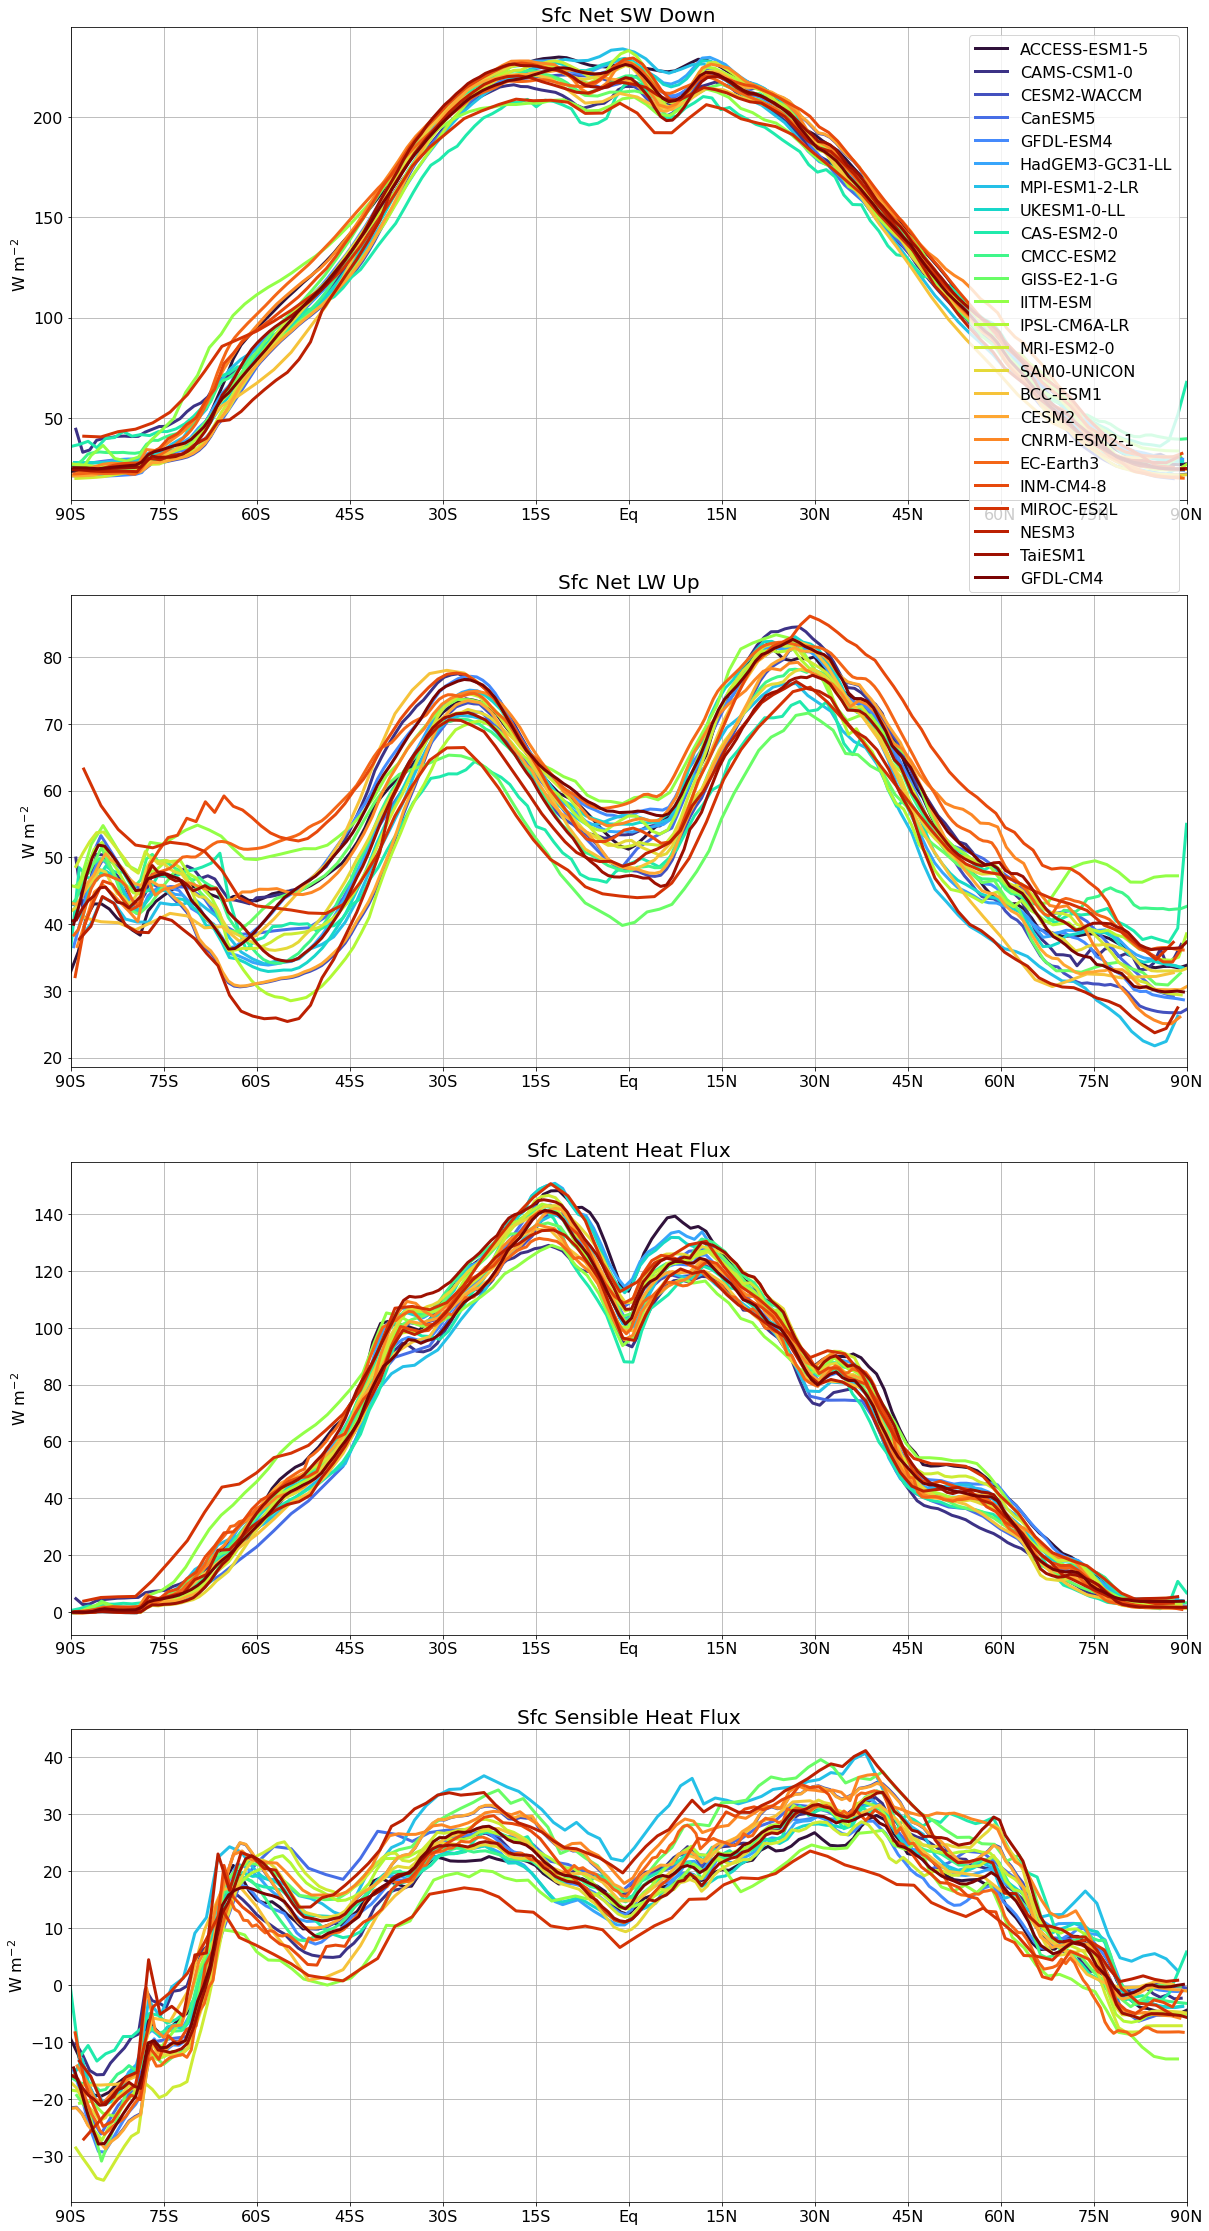

In [19]:
#Check fields!
fig = plt.figure(figsize=(20,40))
plt.subplot(4,1,1)
PlotCMIP_ZL(lat, swnet_C, 2, "Sfc Net SW Down", "W m$^{-2}$")
plt.subplot(4,1,2)
PlotCMIP_ZL(lat, lwnet_C, False, "Sfc Net LW Up", "W m$^{-2}$")
plt.subplot(4,1,3)
PlotCMIP_ZL(lat, lh_C, False, "Sfc Latent Heat Flux", "W m$^{-2}$")
plt.subplot(4,1,4)
PlotCMIP_ZL(lat, sh_C, False, "Sfc Sensible Heat Flux", "W m$^{-2}$")

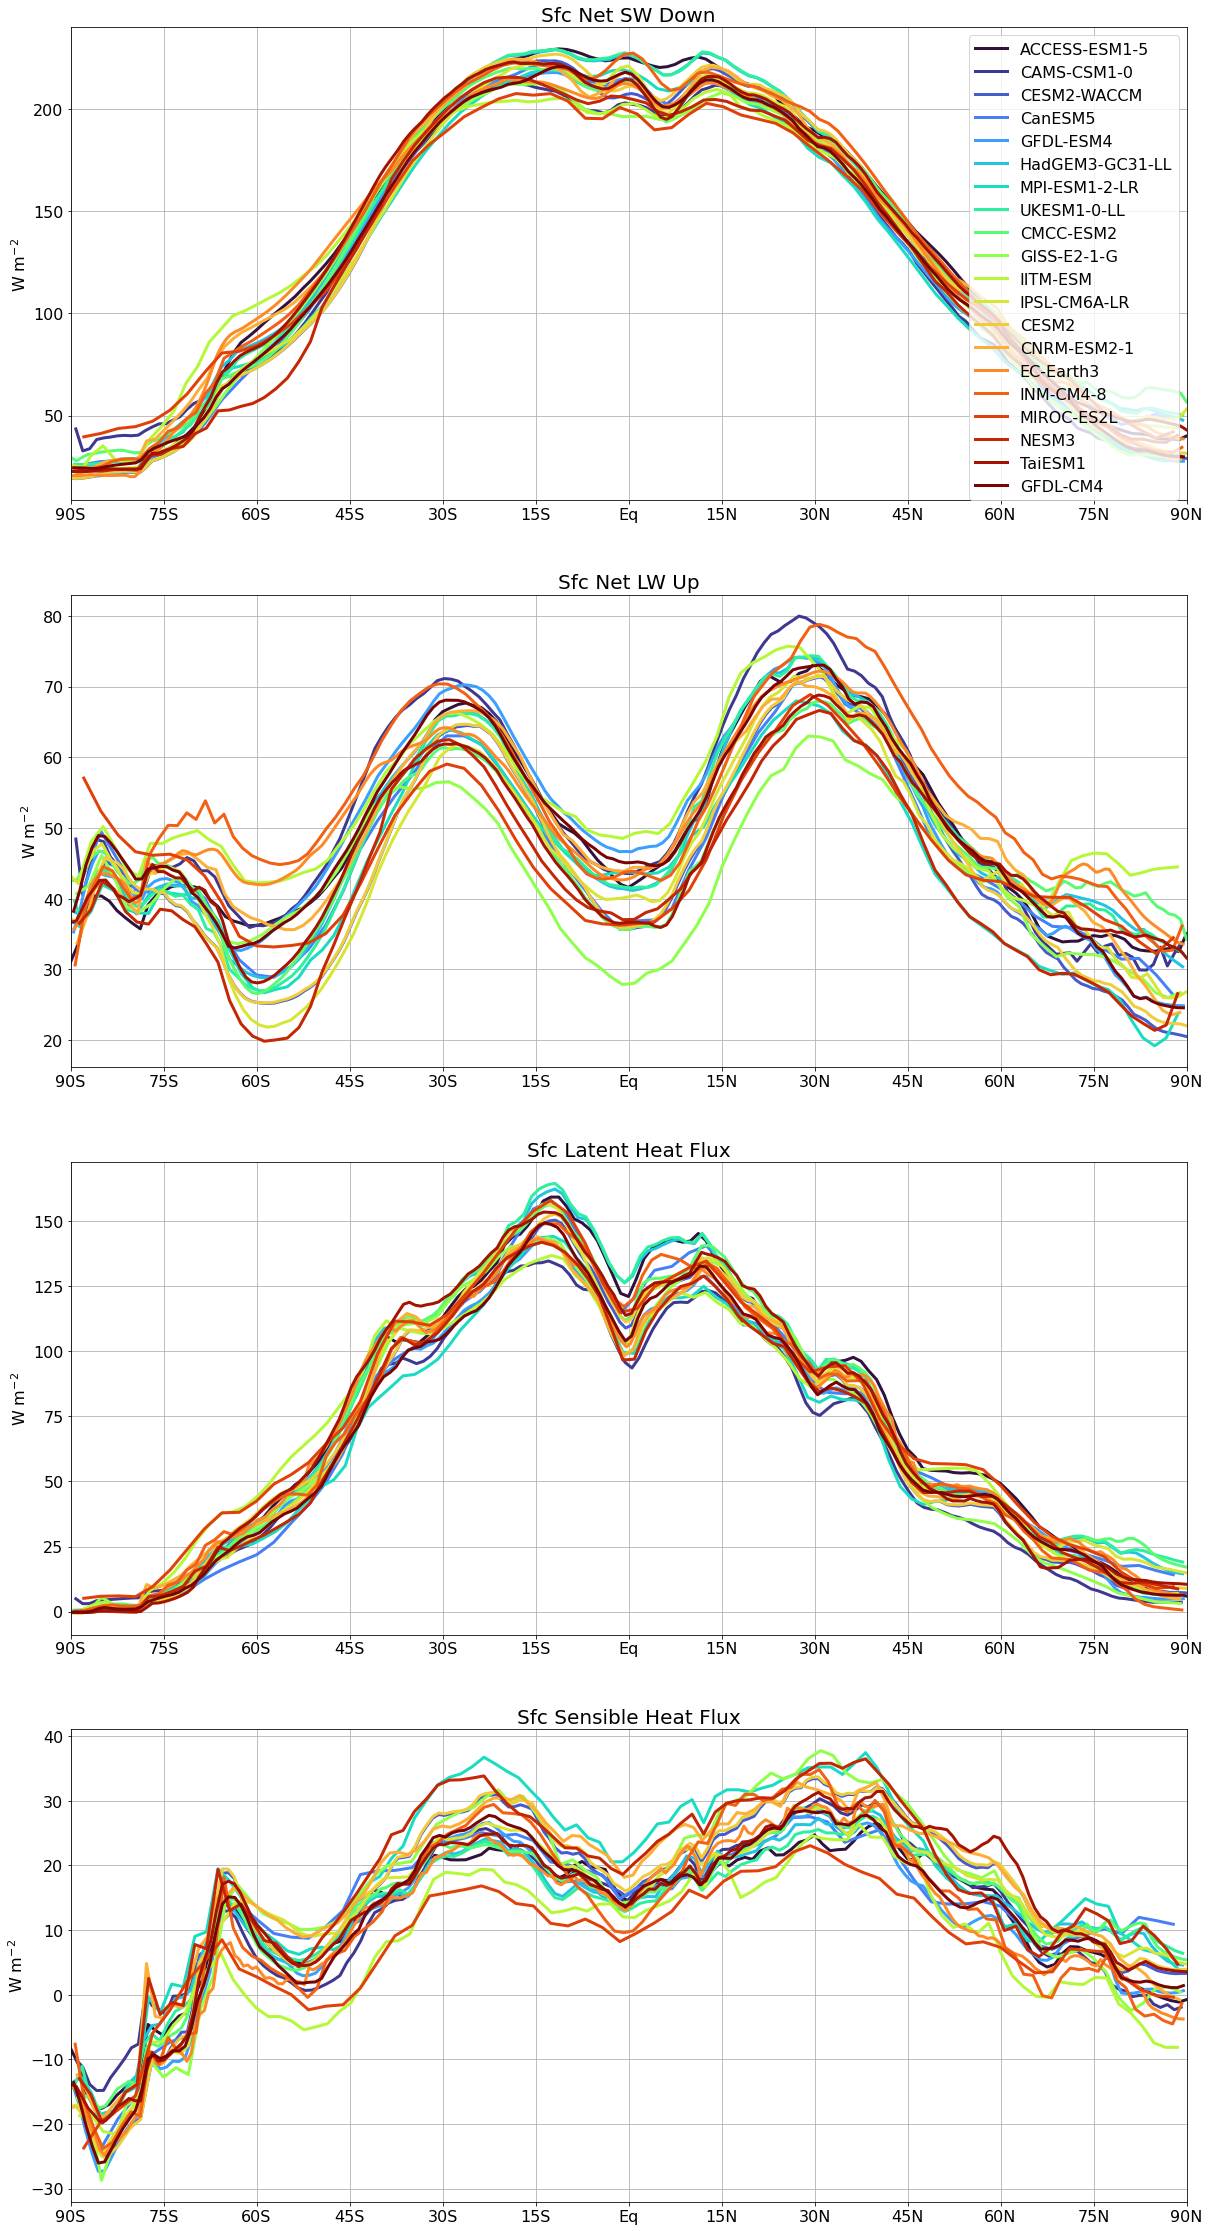

In [20]:
#repeat check for ssp585 fields
fig = plt.figure(figsize=(20,40))
plt.subplot(4,1,1)
PlotCMIP_ZL(lat, swnet_585, 2, "Sfc Net SW Down", "W m$^{-2}$")
plt.subplot(4,1,2)
PlotCMIP_ZL(lat, lwnet_585, False, "Sfc Net LW Up", "W m$^{-2}$")
plt.subplot(4,1,3)
PlotCMIP_ZL(lat, lh_585, False, "Sfc Latent Heat Flux", "W m$^{-2}$")
plt.subplot(4,1,4)
PlotCMIP_ZL(lat, sh_585, False, "Sfc Sensible Heat Flux", "W m$^{-2}$")

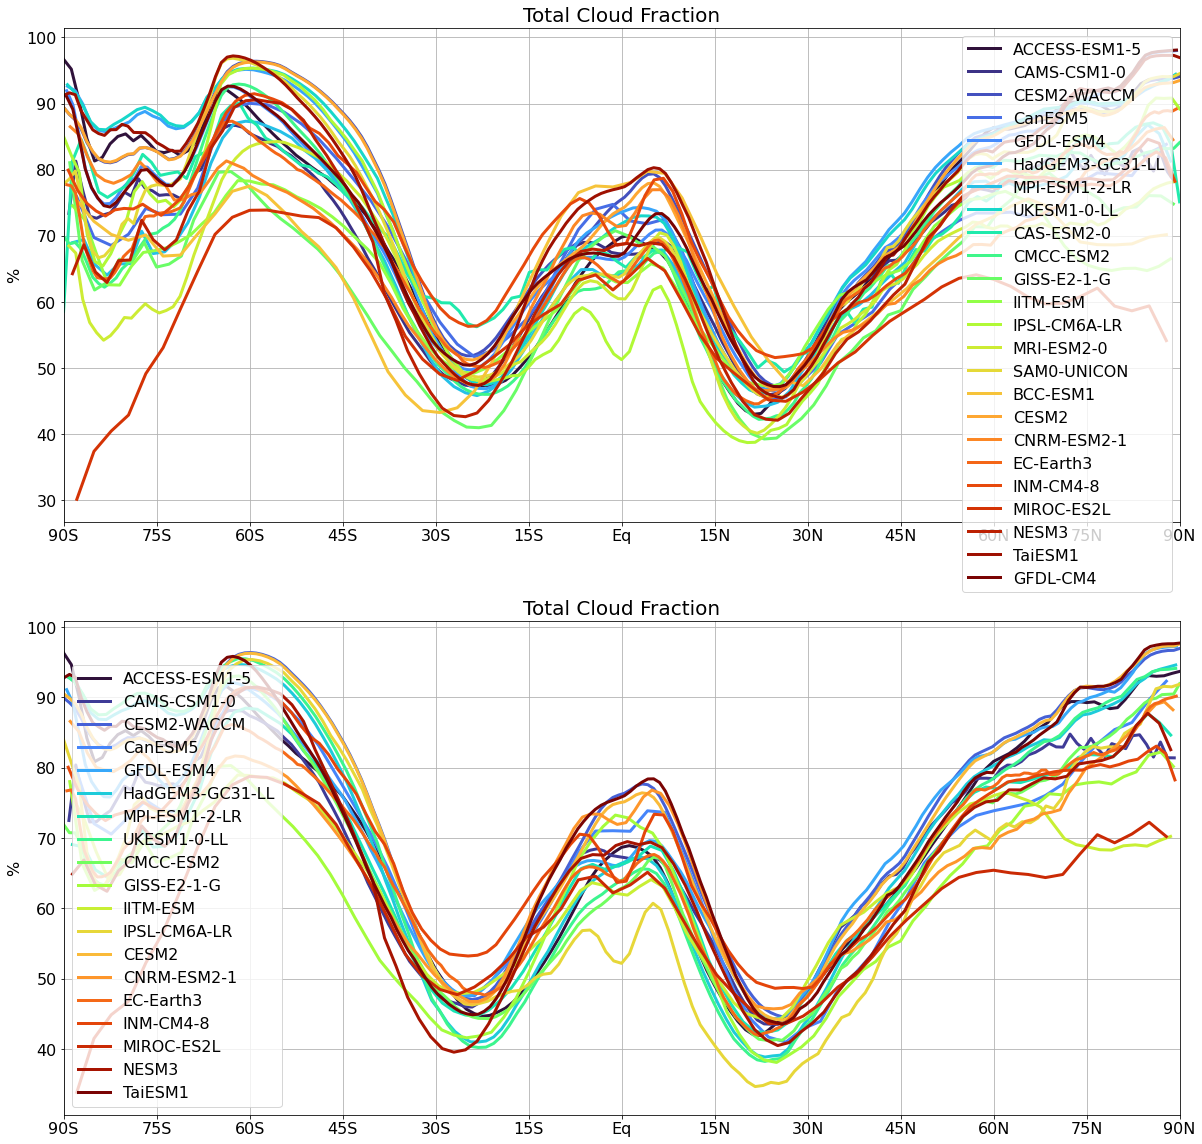

In [21]:
#repeat check for ssp585 fields
fig = plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
PlotCMIP_ZL(lat, clt_C, 2, "Total Cloud Fraction", "%")
plt.subplot(2,1,2)
PlotCMIP_ZL(lat, clt_585, 2, "Total Cloud Fraction", "%")

In [23]:
swnet_anom = {}
lwnet_anom = {}
sh_anom = {}
lh_anom = {}
sfcnet_anom = {}
clt_anom = {}

for i in range(0,nmodel):
    if (mymodels[i] in swnet_C)&(mymodels[i] in swnet_585):
        swnet_anom[mymodels[i]] = swnet_585[mymodels[i]]-swnet_C[mymodels[i]]
    if (mymodels[i] in lwnet_C)&(mymodels[i] in lwnet_585):
        lwnet_anom[mymodels[i]] = -1.*(lwnet_585[mymodels[i]]-lwnet_C[mymodels[i]]) #positive *DOWN*!
    if (mymodels[i] in sh_C)&(mymodels[i] in sh_585):
        sh_anom[mymodels[i]] = sh_585[mymodels[i]]-sh_C[mymodels[i]]
    if (mymodels[i] in lh_C)&(mymodels[i] in lh_585):
        lh_anom[mymodels[i]] = lh_585[mymodels[i]]-lh_C[mymodels[i]]
    if (mymodels[i] in sfcnet_C)&(mymodels[i] in sfcnet_585):
        sfcnet_anom[mymodels[i]] = sfcnet_585[mymodels[i]]-sfcnet_C[mymodels[i]]
    if (mymodels[i] in clt_C)&(mymodels[i] in clt_585):
        clt_anom[mymodels[i]] = clt_585[mymodels[i]]-clt_C[mymodels[i]]

In [35]:
print(swnet_anom["EC-Earth3"])
print(lat["EC-Earth3"])

<xarray.DataArray (lat: 254)>
array([-2.2068481e+00, -2.2026291e+00, -2.1937790e+00, -2.1831894e+00,
       -2.1697769e+00, -2.1509323e+00, -2.1391373e+00, -2.1701050e+00,
       -2.2082214e+00, -2.4199524e+00, -2.5377045e+00, -2.2338715e+00,
       -9.7056580e-01,  4.7736359e-01,  1.5926437e+00,  2.2343903e+00,
        2.7144089e+00,  3.0020065e+00,  3.3673019e+00,  4.2052078e+00,
        6.1374664e+00,  8.0951309e+00,  9.3100357e+00,  9.6732407e+00,
        9.8421860e+00,  1.0413055e+01,  1.1059849e+01,  1.1571678e+01,
        1.1770485e+01,  1.1738792e+01,  1.1534512e+01,  1.1060921e+01,
        1.0037102e+01,  7.7261963e+00,  4.8885345e+00,  2.1033096e+00,
       -6.3751221e-02, -1.9170227e+00, -3.3580170e+00, -4.4317017e+00,
       -5.2865295e+00, -6.0841904e+00, -6.7811737e+00, -7.3843765e+00,
       -7.9144211e+00, -8.3201218e+00, -8.5632858e+00, -8.6346588e+00,
       -8.5352554e+00, -8.1935196e+00, -7.7225571e+00, -7.2125931e+00,
       -6.7413406e+00, -6.2529144e+00, -5.74382

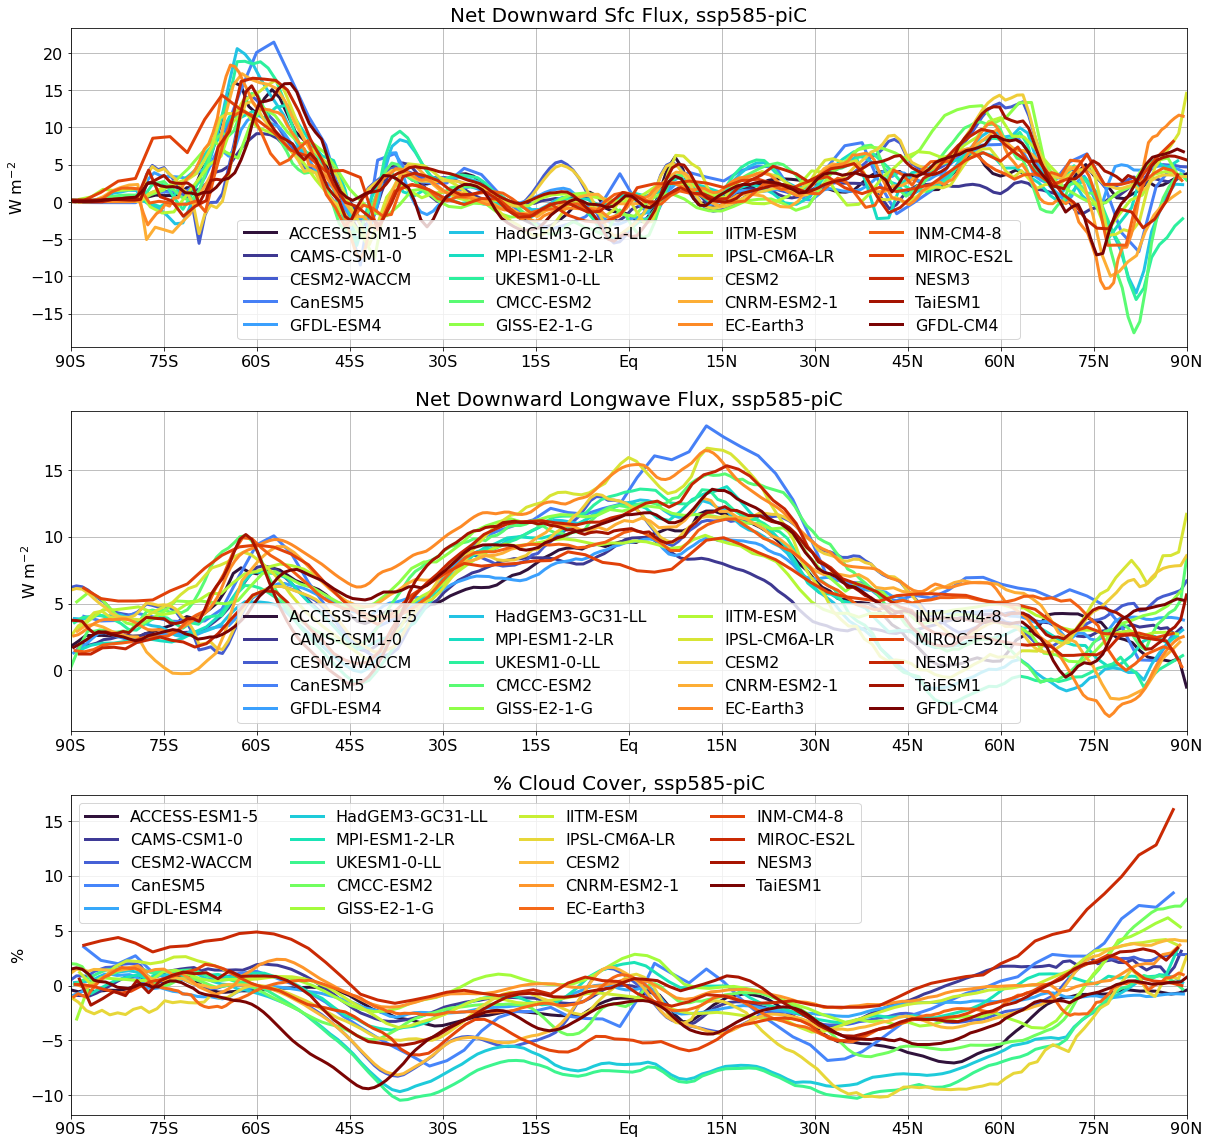

In [25]:
fig = plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, sfcnet_anom, 3, "Net Downward Sfc Flux, ssp585-piC", "W m$^{-2}$")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, lwnet_anom, 3, "Net Downward Longwave Flux, ssp585-piC", "W m$^{-2}$")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, clt_anom, 3, "% Cloud Cover, ssp585-piC", "%")


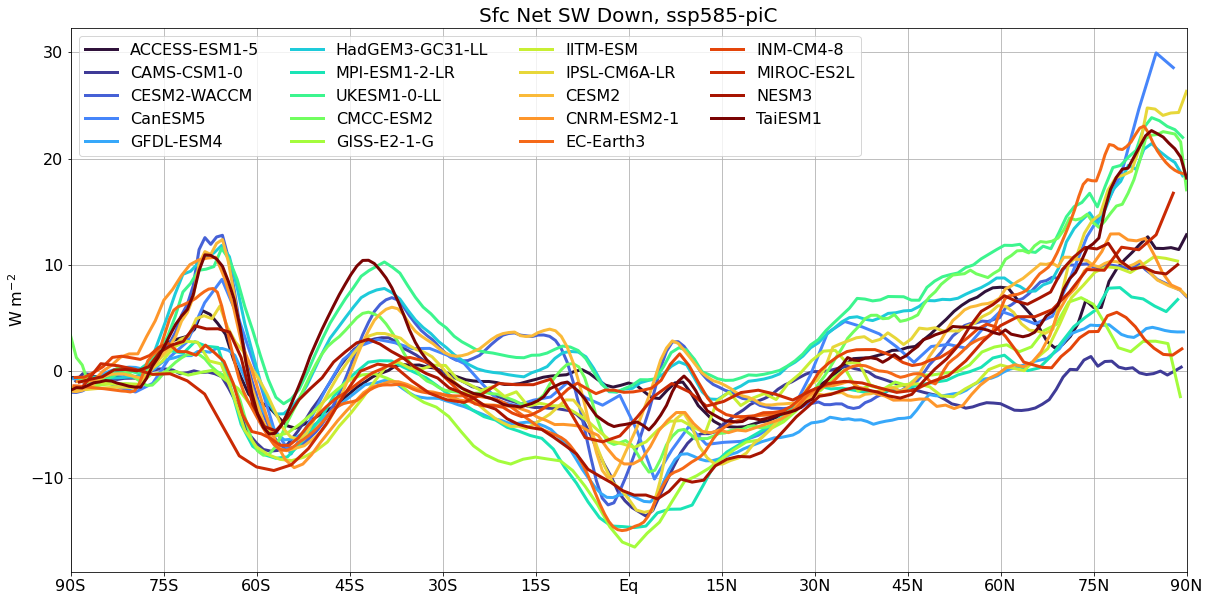

In [16]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, swnet_anom, 3, "Sfc Net SW Down, ssp585-piC", "W m$^{-2}$")

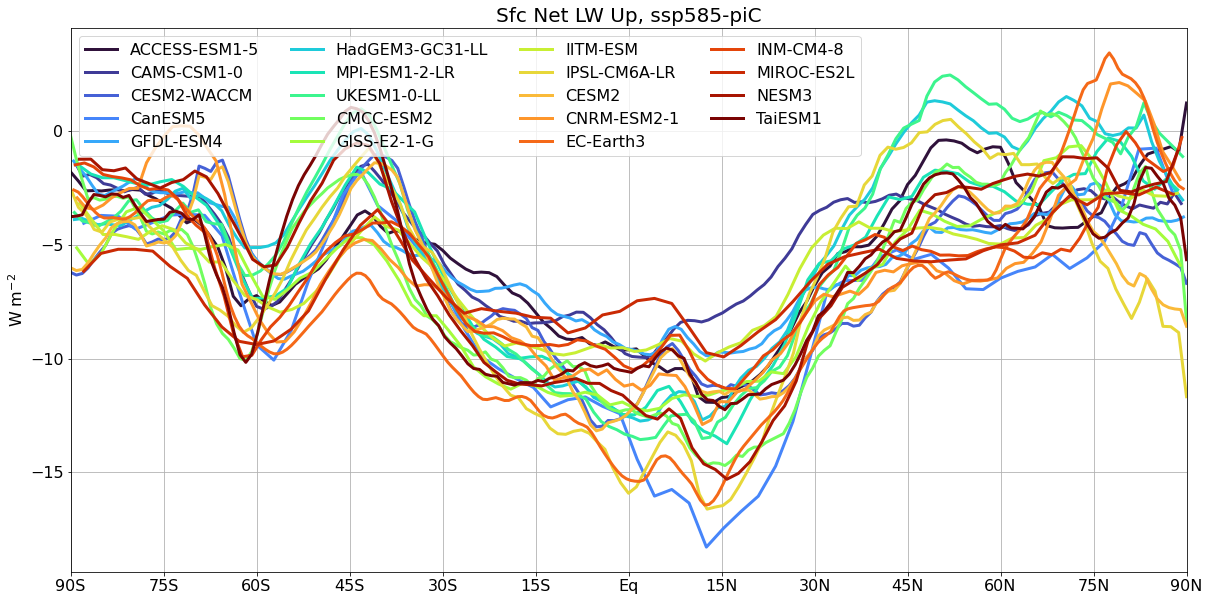

In [17]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, lwnet_anom, 3, "Sfc Net LW Up, ssp585-piC", "W m$^{-2}$")

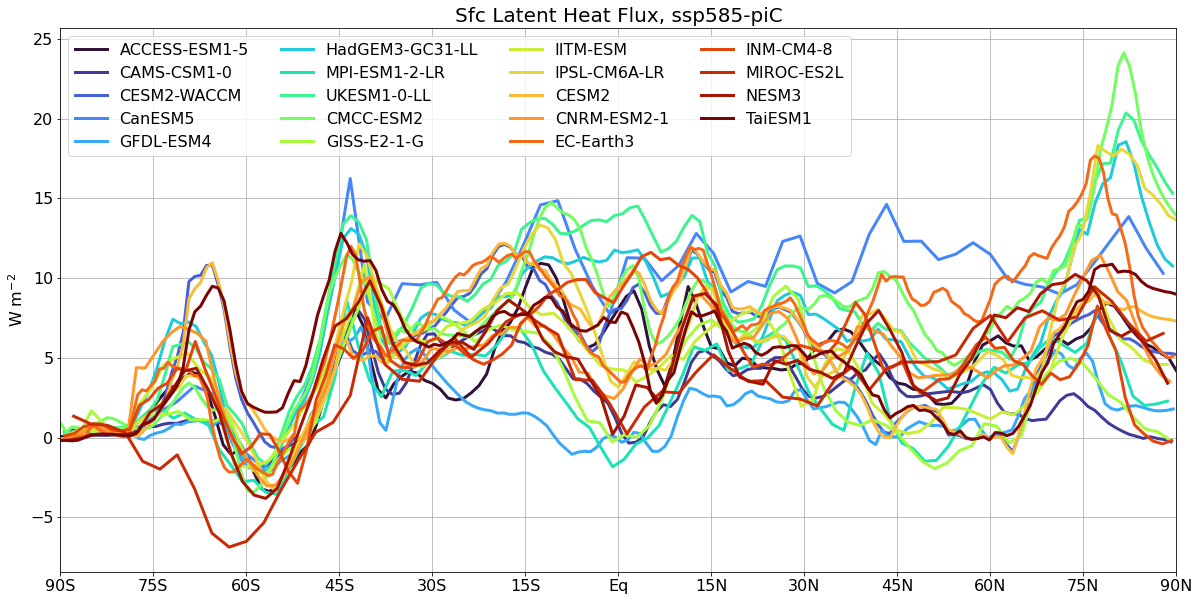

In [18]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, lh_anom, 3, "Sfc Latent Heat Flux, ssp585-piC", "W m$^{-2}$")

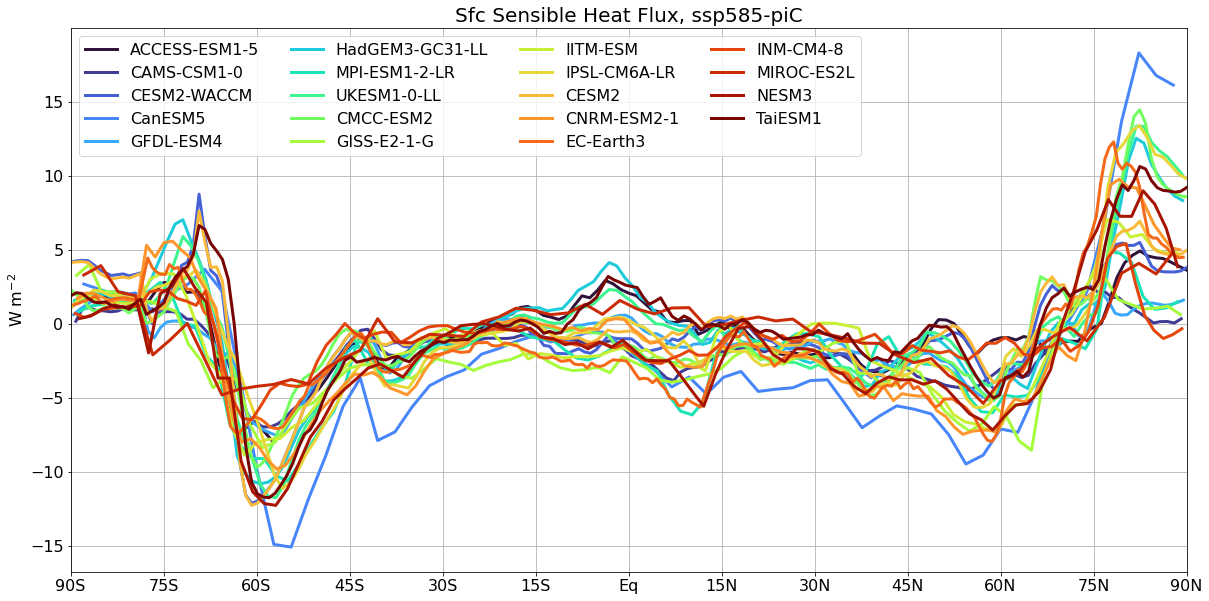

In [19]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, sh_anom, 3, "Sfc Sensible Heat Flux, ssp585-piC", "W m$^{-2}$")

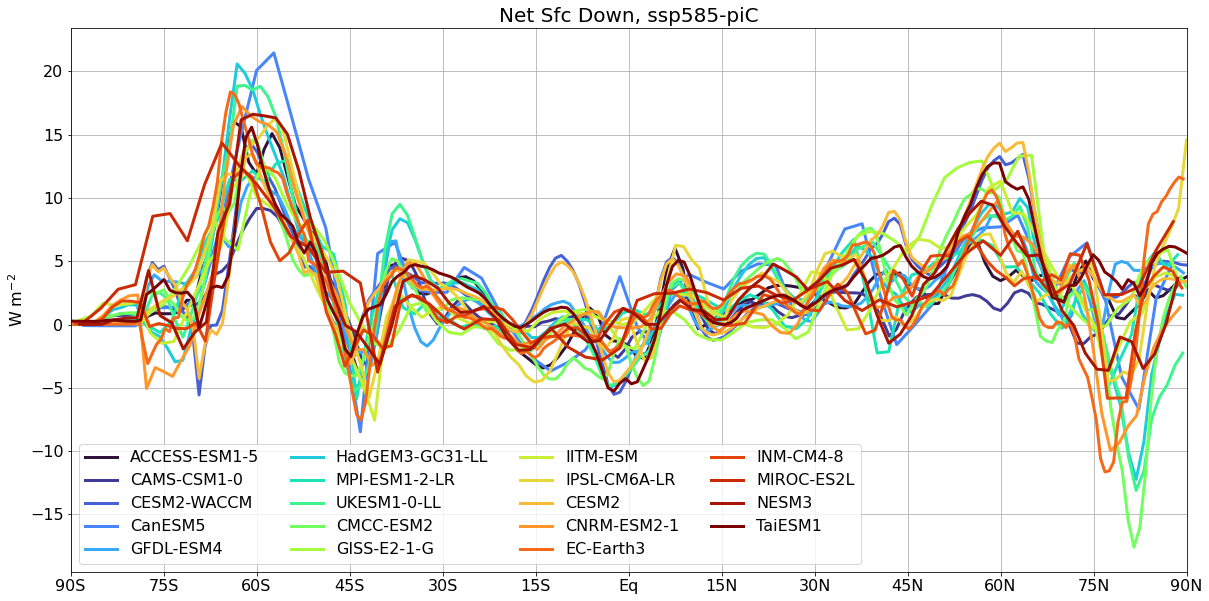

In [20]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, sfcnet_anom, 3, "Net Sfc Down, ssp585-piC", "W m$^{-2}$")

In [21]:
#Grab TOA Fluxes
toaswd_C = {}
toaswu_C = {}
toalwu_C = {}
toaswd_585 = {}
toaswu_585 = {}
toalwu_585 = {}
#Grab Control
datadir = "/net/aeolus/aura/hansingh/CMIP/piControl/processed/"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsut_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsut_piControl.nc", decode_times=False)
        toaswu_C[mymodels[i]]=myData.rsut[0,:,:].mean(axis=1)
        lat[mymodels[i]]=myData.lat
    if os.path.exists(datadir+mymodels[i]+"_rsdt_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsdt_piControl.nc", decode_times=False)
        toaswd_C[mymodels[i]]=myData.rsdt[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlut_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlut_piControl.nc", decode_times=False)
        toalwu_C[mymodels[i]]=myData.rlut[0,:,:].mean(axis=1)
        
datadir = "/net/aeolus/aura/hansingh/CMIP/ssp585/processed/"
yrstr = "yrs2070-2100"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsut_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsut_ssp585_"+yrstr+".nc", decode_times=False)
        toaswu_585[mymodels[i]]=myData.rsut[0,:,:].mean(axis=1)
        lat[mymodels[i]]=myData.lat
    if os.path.exists(datadir+mymodels[i]+"_rsdt_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsdt_ssp585_"+yrstr+".nc", decode_times=False)
        toaswd_585[mymodels[i]]=myData.rsdt[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlut_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlut_ssp585_"+yrstr+".nc", decode_times=False)
        toalwu_585[mymodels[i]]=myData.rlut[0,:,:].mean(axis=1)

Working on ACCESS-ESM1-5
Working on CAMS-CSM1-0
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
Working on BCC-ESM1
Working on CESM2
Working on CNRM-ESM2-1
Working on EC-Earth3
Working on GISS-E2-2-G
Working on INM-CM4-8
Working on MIROC-ES2L
Working on NESM3
Working on TaiESM1
Working on ACCESS-ESM1-5
Working on CAMS-CSM1-0
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
W

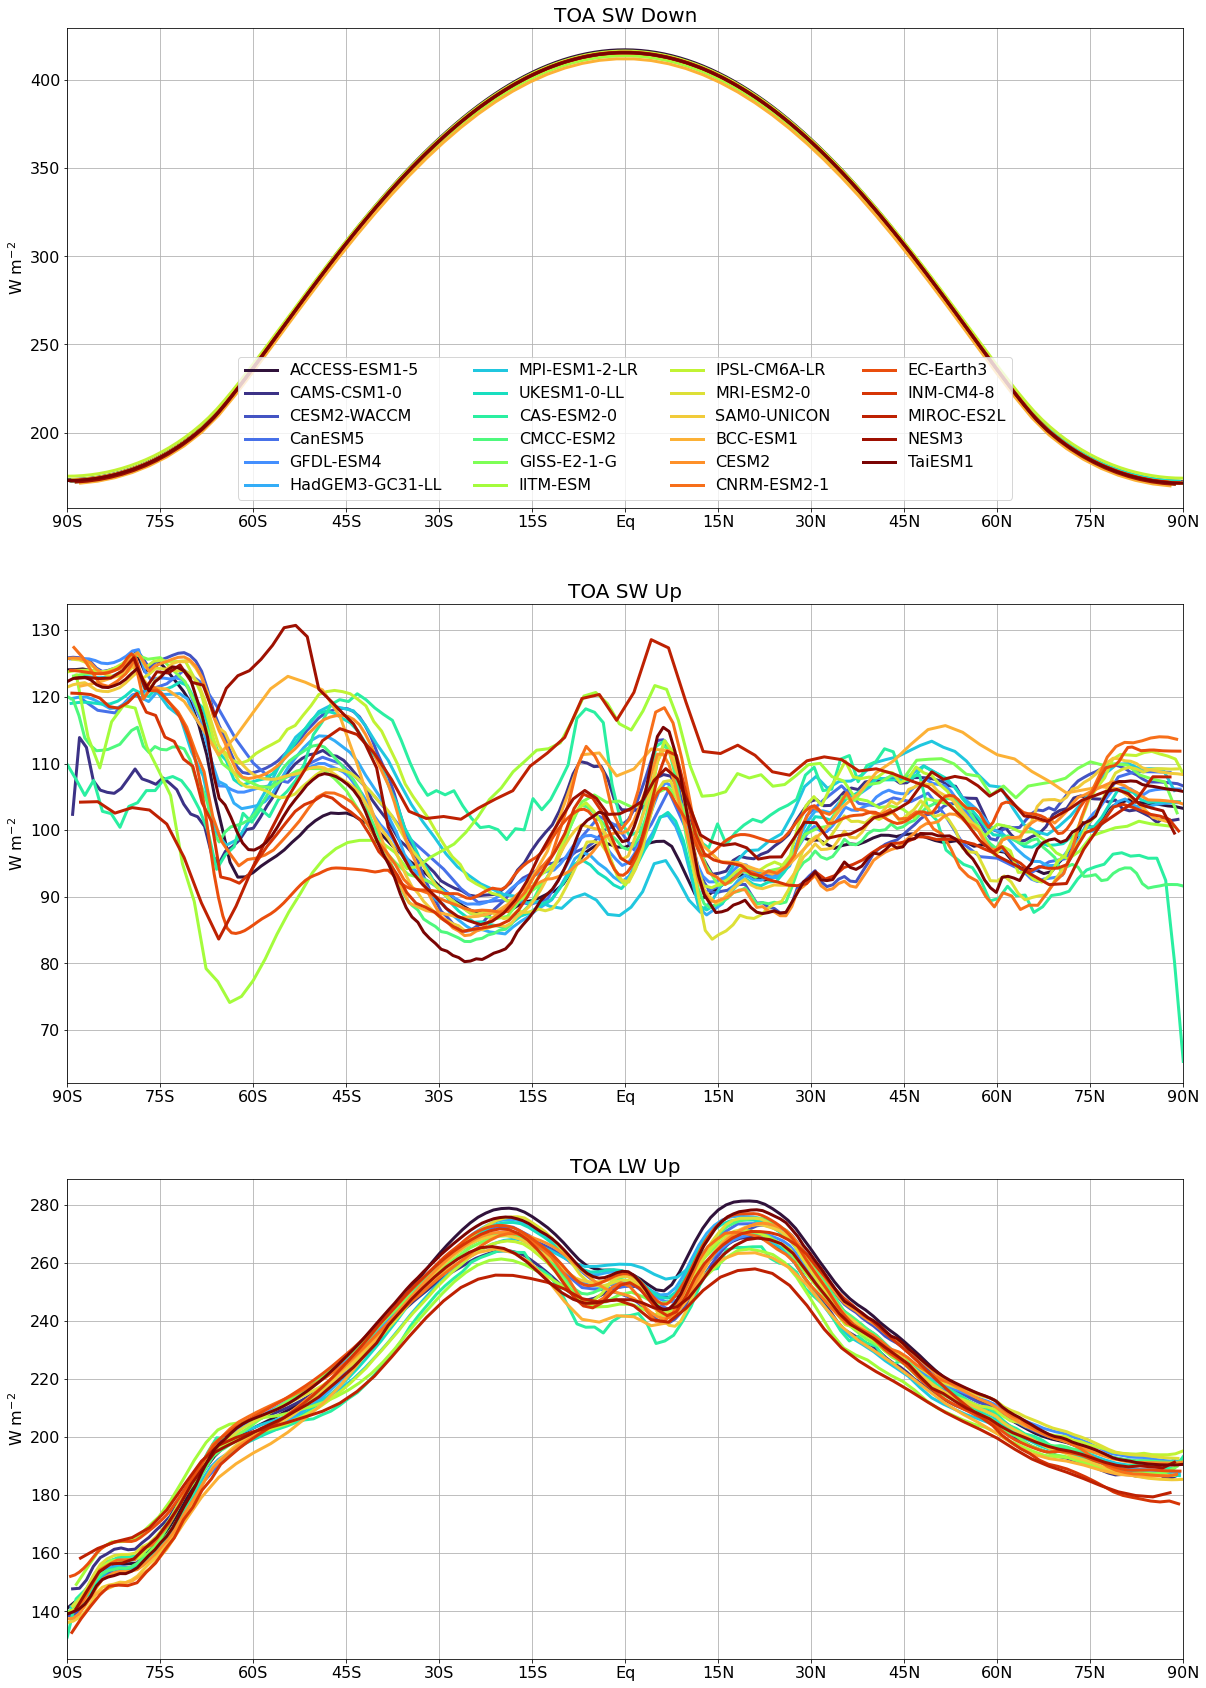

In [22]:
#Check fields!
fig = plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, toaswd_C, 3, "TOA SW Down", "W m$^{-2}$")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, toaswu_C, False, "TOA SW Up", "W m$^{-2}$")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, toalwu_C, False, "TOA LW Up", "W m$^{-2}$")

In [23]:
print(toaswd_585)

{'ACCESS-ESM1-5': <xarray.DataArray 'rsdt' (lat: 145)>
array([173.33482, 173.42308, 173.68922, 174.13332, 174.7559 , 175.5592 ,
       176.546  , 177.72017, 179.08827, 180.65556, 182.42827, 184.41405,
       186.62187, 189.0634 , 191.75252, 194.7053 , 197.94344, 201.50024,
       205.43172, 209.88403, 214.9508 , 220.36101, 225.99733, 231.79102,
       237.69383, 243.66945, 249.68945, 255.7304 , 261.77274, 267.8002 ,
       273.7983 , 279.75464, 285.65817, 291.49902, 297.2683 , 302.95798,
       308.56058, 314.0694 , 319.47824, 324.78122, 329.9729 , 335.0483 ,
       340.00272, 344.83157, 349.53098, 354.09668, 358.52512, 362.81277,
       366.95633, 370.95267, 374.7988 , 378.49197, 382.02954, 385.40897,
       388.62796, 391.68436, 394.57608, 397.30106, 399.8577 , 402.24417,
       404.45895, 406.5007 , 408.36795, 410.0596 , 411.57468, 412.91208,
       414.07083, 415.05063, 415.85043, 416.46997, 416.90872, 417.16666,
       417.24332, 417.13892, 416.85336, 416.38675, 415.7396 , 414.912

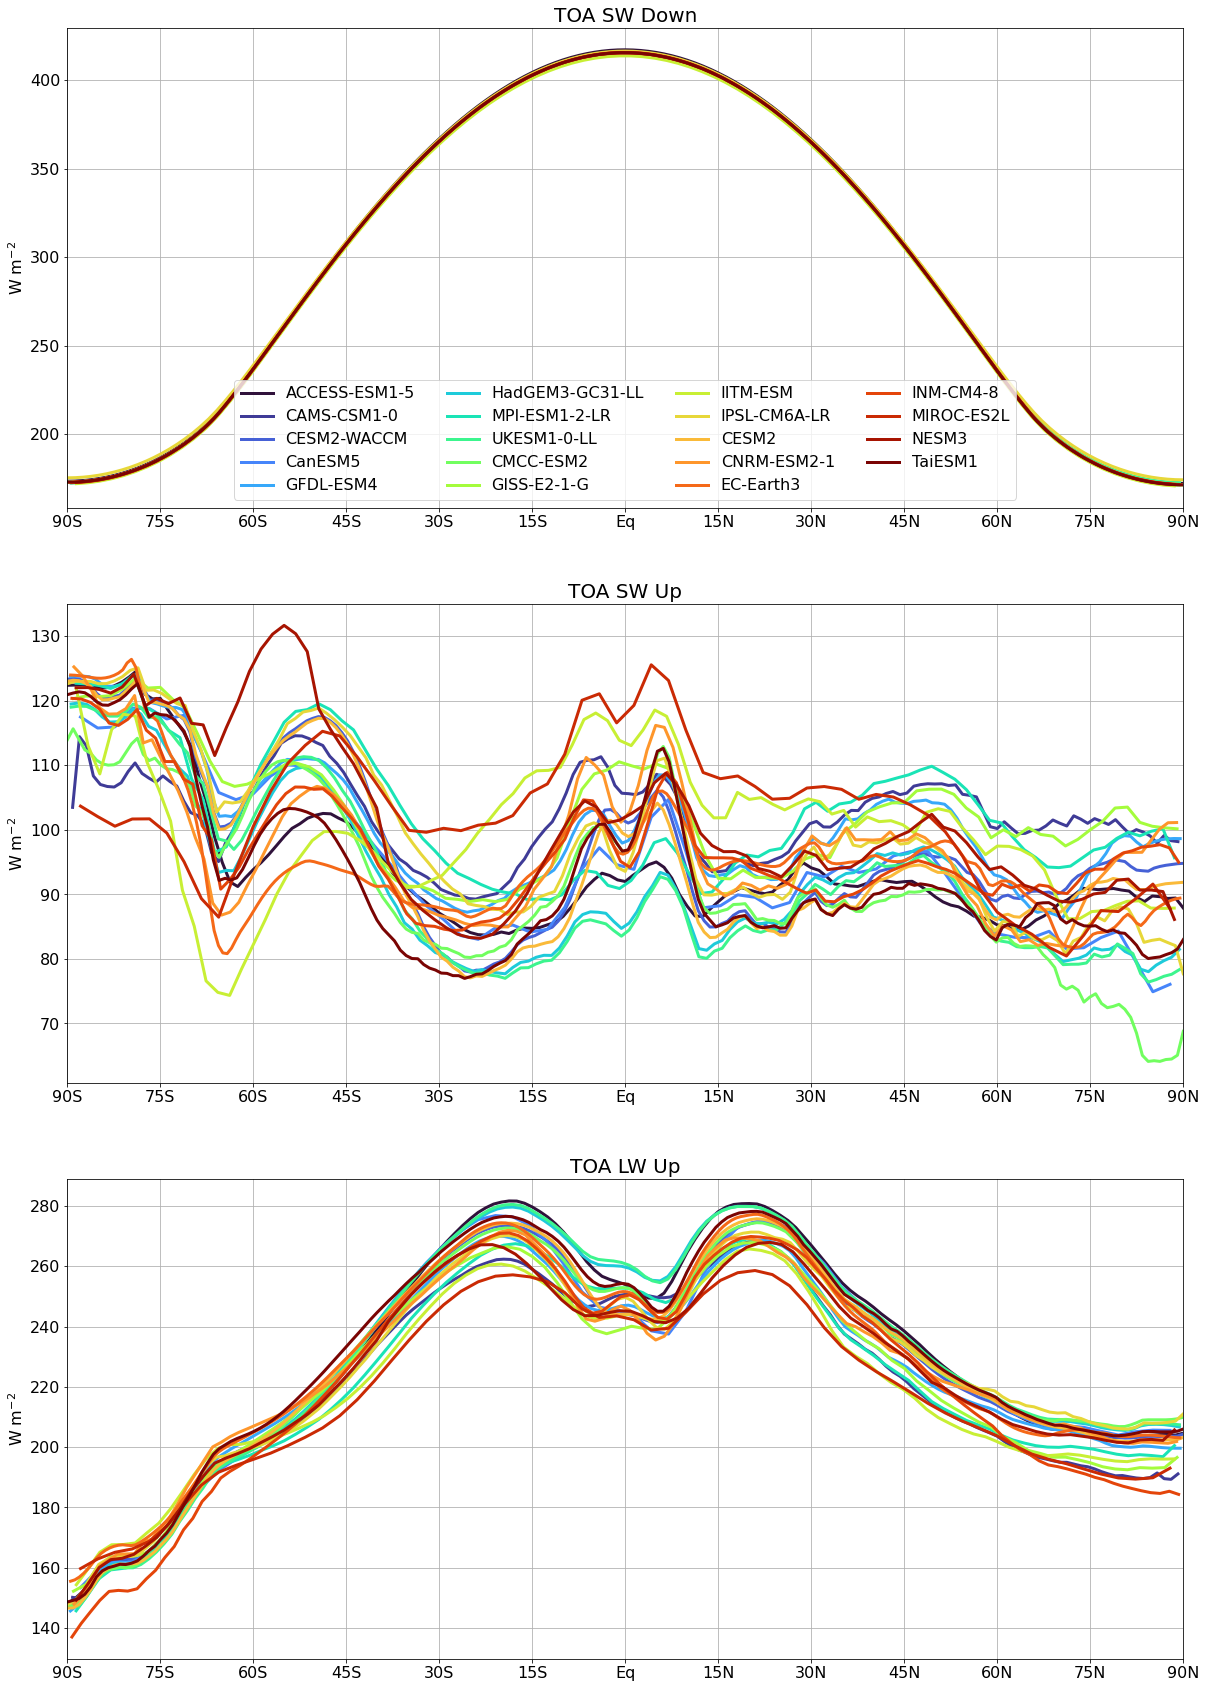

In [24]:
#Check fields!
fig = plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, toaswd_585, 3, "TOA SW Down", "W m$^{-2}$")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, toaswu_585, False, "TOA SW Up", "W m$^{-2}$")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, toalwu_585, False, "TOA LW Up", "W m$^{-2}$")

In [27]:
OLR_C = toalwu_C
ASR_C = {}
OLR_585 = toalwu_585
ASR_585 = {}
OLR_anom = {}
ASR_anom = {}

for i in range(0,nmodel):
    if (mymodels[i] in toaswu_C) and (mymodels[i] in toaswd_C):
        ASR_C[mymodels[i]] = toaswd_C[mymodels[i]]-toaswu_C[mymodels[i]]
    if (mymodels[i] in toaswu_585) and (mymodels[i] in toaswd_585):
        ASR_585[mymodels[i]] = toaswd_585[mymodels[i]]-toaswu_585[mymodels[i]]
    if (mymodels[i] in ASR_C) and (mymodels[i] in ASR_585):
        ASR_anom[mymodels[i]] = ASR_585[mymodels[i]]-ASR_C[mymodels[i]]
    if (mymodels[i] in OLR_C) and (mymodels[i] in OLR_585):
        OLR_anom[mymodels[i]] = OLR_585[mymodels[i]]-OLR_C[mymodels[i]]

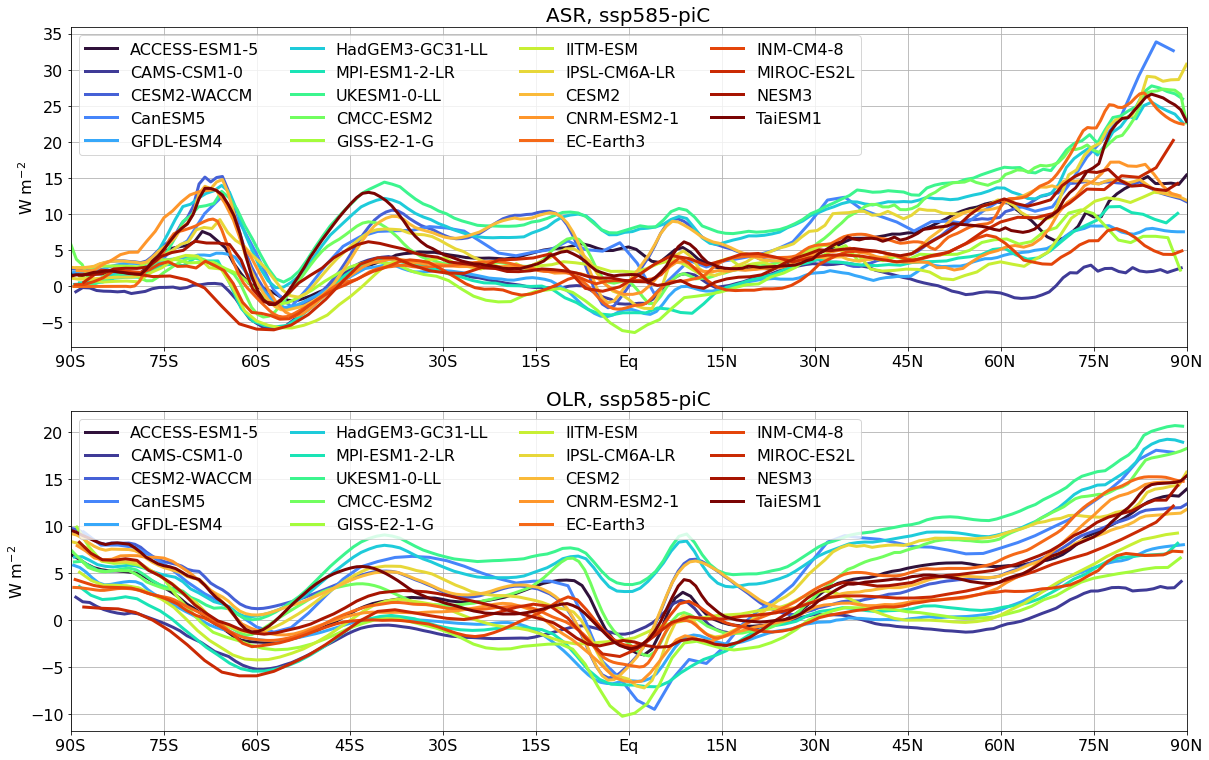

In [28]:
fig = plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, ASR_anom, 3, "ASR, ssp585-piC", "W m$^{-2}$")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, OLR_anom, 3, "OLR, ssp585-piC", "W m$^{-2}$")